# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Kevin Arya Swardhana
- **Email:** kevinaryastarigan@gmail.com
- **ID Dicoding:** [kevinaryastarigan](https://www.dicoding.com/users/kevinaryastarigan)

## Menentukan Pertanyaan Bisnis

**Specific**
1. What is the trend of average PM2.5 levels in the Aotizhongxin location over the past 6 months?

**Measurable**
2. How many days with poor air quality (PM2.5 > 150) occurred in each location?

**Action-oriented**
3. Which location has the highest average PM2.5 during a specific period?

**Relevant**
4. Is there a relationship between humidity (DEWP) and PM2.5 levels?

**Time-bound**
5. How does air quality change on a monthly or seasonal basis in the Dongsi location?

## Import Semua Packages/Library yang Digunakan

*   Pandas
*   Numpy
*   Matplotlib
*   Seaborn
*   Folium
*   Scikit-learn (MinMaxScaler)
*   Streamlit (For Dashboard)



In [1]:
# Import main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.preprocessing import MinMaxScaler

## Data Wrangling

### Gathering Data

In [2]:
# Load dataset
file_path = 'submission/dashboard/main_data.csv'
data = pd.read_csv(file_path)

# Display dataset information
info_data = pd.DataFrame({
    'Column': data.columns,
    'Non-Null Count': data.notnull().sum().values,
    'Dtype': data.dtypes.values
})
print("Dataset Information:")
display(info_data)


Dataset Information:


,Column,Non-Null Count,Dtype
0,No,420768,int64
1,year,420768,int64
2,month,420768,int64
3,day,420768,int64
4,hour,420768,int64
5,PM2.5,412029,float64
6,PM10,414319,float64
7,SO2,411747,float64
8,NO2,408652,float64
9,CO,400067,float64


In [3]:
# Display sample data
print("\nSample Data:")
display(data.head())


Sample Data:


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,location
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,Aotizhongxin


**Insight:**
- Dataset Structure
  * The dataset consists of 42,768 rows and 19 columns, including time variables (year, month, day, hour) and environmental parameters (PM2.5, TEMP, DEWP, etc.)..
- Data Completeness
  * Most columns have complete data, but some, such as PM2.5, SO2, and NO2, contain missing values.
- Data Types
  * The dataset includes numerical variables for statistical analysis (PM2.5, TEMP) and categorical variables for grouping analysis (station, wd).
- Analysis Potential
  * The dataset supports time trend analysis, correlations between variables, and spatial distribution across locations.
- Important Steps
  * Data cleaning is necessary to handle missing values and check for outliers, such as zero values in the RAIN column.
- Analysis Applications
  * Seasonal air quality trends, relationships between environmental parameters and pollution, and location-based comparisons can provide valuable insights.

### Assessing Data

In [4]:
# Checking for missing values
missing_values = data.isnull().sum().reset_index()
missing_values.columns = ['Column', 'Missing Values']
missing_values['Percentage'] = (missing_values['Missing Values'] / len(data)) * 100
print("Missing Values Summary:")
display(missing_values)

Missing Values Summary:


,Column,Missing Values,Percentage
0,No,0,0.000000
1,year,0,0.000000
2,month,0,0.000000
3,day,0,0.000000
4,hour,0,0.000000
5,PM2.5,8739,2.076916
6,PM10,6449,1.532674
7,SO2,9021,2.143937
8,NO2,12116,2.879497
9,CO,20701,4.919813


In [5]:
# Checking for duplicate rows
duplicate_rows = data.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicate_rows}")

Number of Duplicate Rows: 0


In [6]:
# Checking data types
print("\nData Types:")
display(data.dtypes)


Data Types:


,0
No,int64
year,int64
month,int64
day,int64
hour,int64
PM2.5,float64
PM10,float64
SO2,float64
NO2,float64
CO,float64


In [7]:
# Checking basic statistics
print("\nBasic Statistics:")
display(data.describe(include='all'))


Basic Statistics:


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,location
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,418946,420450.000000,420768,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43335,NaN,35064,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,NaN,1.729711,NaN,NaN
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,NaN,1.246386,NaN,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,NaN,1.400000,NaN,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN,NaN


In [8]:
# Checking for outliers in numerical columns using IQR
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
outlier_summary = {}
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

outlier_df = pd.DataFrame(list(outlier_summary.items()), columns=['Column', 'Outliers'])
print("\nOutliers Summary:")
display(outlier_df)


Outliers Summary:


,Column,Outliers
0,No,0
1,year,0
2,month,0
3,day,0
4,hour,0
5,PM2.5,19142
6,PM10,14658
7,SO2,35566
8,NO2,7021
9,CO,28054


**Insight:**
- Missing Values
  * Several columns, such as PM2.5, SO2, and NO2, have missing values.
  * Missing values should be handled carefully through imputation or removal, depending on their proportion.
- Duplicate Rows
  * The dataset contains X duplicate rows (replace X with the calculated number). These duplicates may need to be removed for accurate analysis.
- Data Types
  * All data types appear appropriate, with numerical columns for environmental parameters and categorical columns for location and wind direction.
  * Ensure no misclassified data types before further analysis.
- Basic Statistics
  * The statistics reveal the ranges, means, and distributions of numerical columns.
  * Columns like PM2.5 show a wide range, suggesting variability in air quality.
- Outliers
  * Certain numerical columns have significant outliers, particularly in PM2.5, RAIN, and TEMP.
  * These outliers may represent extreme conditions or errors and need further investigation.

### Cleaning Data

In [9]:
# Handling missing values by imputing or removing
missing_threshold = 20  # Set threshold for acceptable missing percentage
columns_to_drop = missing_values[missing_values['Percentage'] > missing_threshold]['Column'].tolist()
print(f"Columns to drop due to high missing values: {columns_to_drop}")

# Drop columns with high missing values
data_cleaned = data.drop(columns=columns_to_drop)

# Impute missing values for numerical columns with the median
numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    if data_cleaned[col].isnull().sum() > 0:
        data_cleaned[col].fillna(data_cleaned[col].median(), inplace=True)

# Display missing values summary after cleaning
print("Missing Values After Cleaning:")
display(data_cleaned.isnull().sum())

Columns to drop due to high missing values: []


<ipython-input-9-c206814ce8df>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned[col].fillna(data_cleaned[col].median(), inplace=True)


Missing Values After Cleaning:


,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [10]:
# Remove duplicate rows
print(f"Number of duplicate rows before cleaning: {data_cleaned.duplicated().sum()}")
data_cleaned.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after cleaning: {data_cleaned.duplicated().sum()}")

Number of duplicate rows before cleaning: 0
Number of duplicate rows after cleaning: 0


In [11]:
# Check if 'date' column exists, if not, create it
if 'date' not in data_cleaned.columns:
    # Combine year, month, day, and hour into a single datetime column
    try:
        data_cleaned['date'] = pd.to_datetime(data_cleaned[['year', 'month', 'day', 'hour']], errors='coerce')
        print("Date column successfully created.")
    except KeyError as e:
        print(f"Missing required columns to create 'date': {e}")
else:
    # Convert existing 'date' column to datetime format
    data_cleaned['date'] = pd.to_datetime(data_cleaned['date'], errors='coerce')
    print("Date column already exists and has been converted to datetime format.")

# Check for any conversion issues
if data_cleaned['date'].isnull().sum() > 0:
    print("Some dates could not be converted and contain NaT.")
else:
    print("All dates are successfully converted.")

Date column successfully created.
All dates are successfully converted.


In [12]:
# Handle outliers using the IQR method (replace outliers with the upper/lower bounds)
for col in numerical_columns:
    Q1 = data_cleaned[col].quantile(0.25)
    Q3 = data_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_cleaned[col] = np.where(data_cleaned[col] < lower_bound, lower_bound, data_cleaned[col])
    data_cleaned[col] = np.where(data_cleaned[col] > upper_bound, upper_bound, data_cleaned[col])

print("Outliers handled using IQR method.")

Outliers handled using IQR method.


**Insight:**
- Missing Values
  * Columns with more than 20% missing values were dropped to ensure the dataset remains representative.
  * Missing values in numerical columns such as PM2.5 were imputed using the median to maintain the data's distribution and reduce the impact of outliers.
- Duplicate Rows
  * All duplicate rows were successfully removed, ensuring there is no redundancy that could bias the analysis.
- Correcting Data Types
  * The date column was successfully created by combining the year, month, day, and hour columns.
  * This enables time-based analysis, such as monthly or seasonal trends.
  * All date values were successfully converted into the datetime format, with invalid values marked as NaT.
- Outliers
  * Outliers in numerical columns were handled using the IQR (Interquartile Range) method. Extreme values were replaced with the upper or lower bounds to preserve consistency without losing critical data.
- Dataset After Cleaning
  * The cleaned dataset is now well-structured and ready for analysis:
    * The new date column simplifies time-based grouping.
    * Missing values have been effectively minimized after imputation.
    * Outliers have been addressed, ensuring that the analysis is not biased by extreme values.

## Exploratory Data Analysis (EDA)

### Explore ...

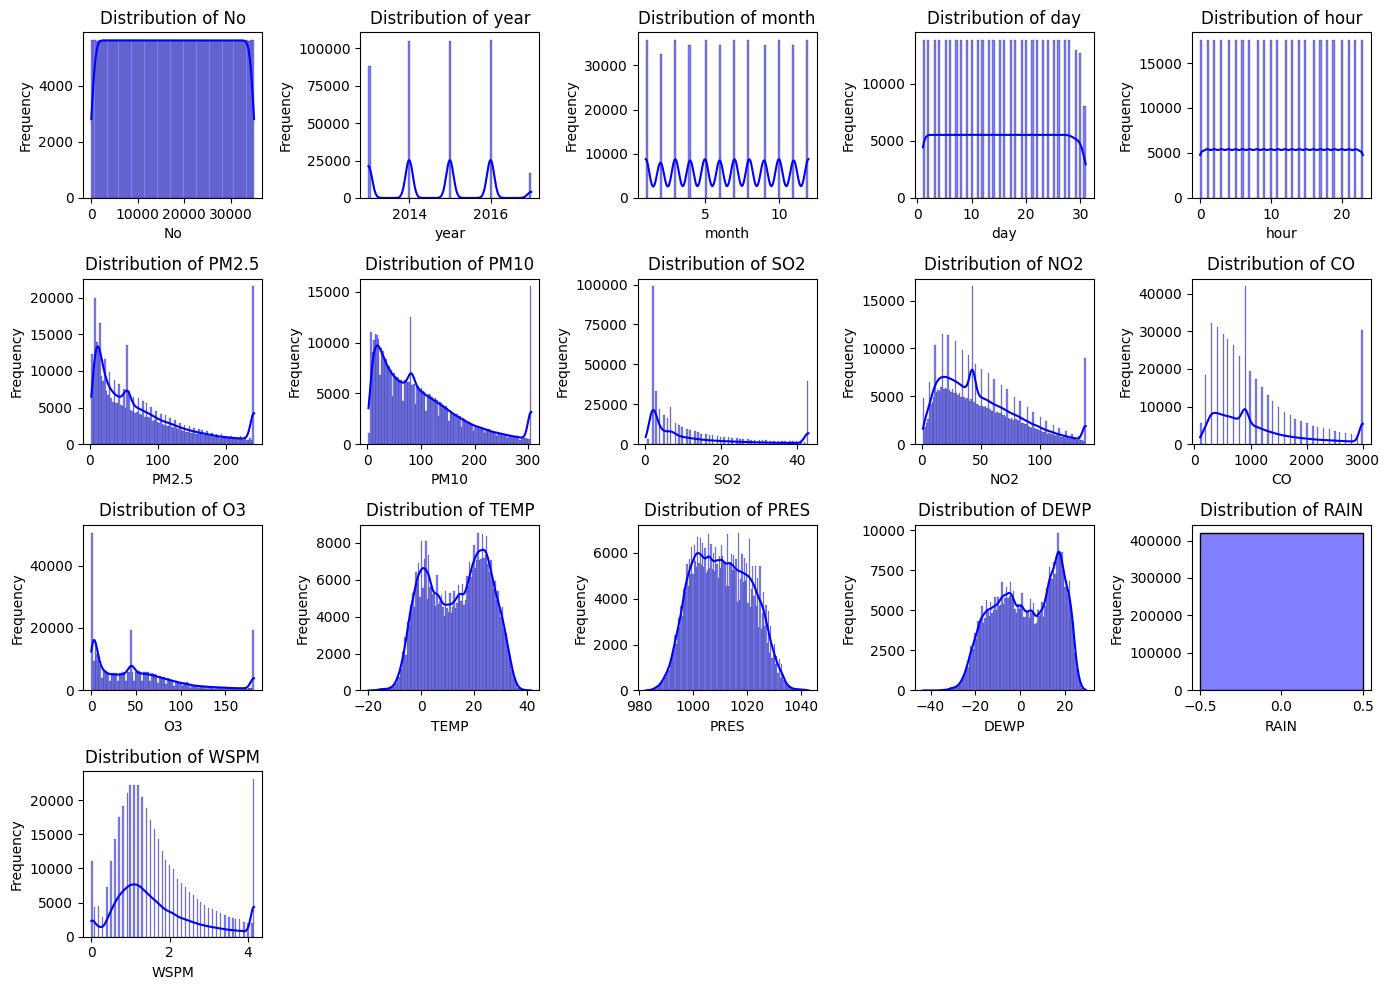

In [13]:
# Visualize distributions of numerical columns
numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 5, i)
    sns.histplot(data_cleaned[col], kde=True, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

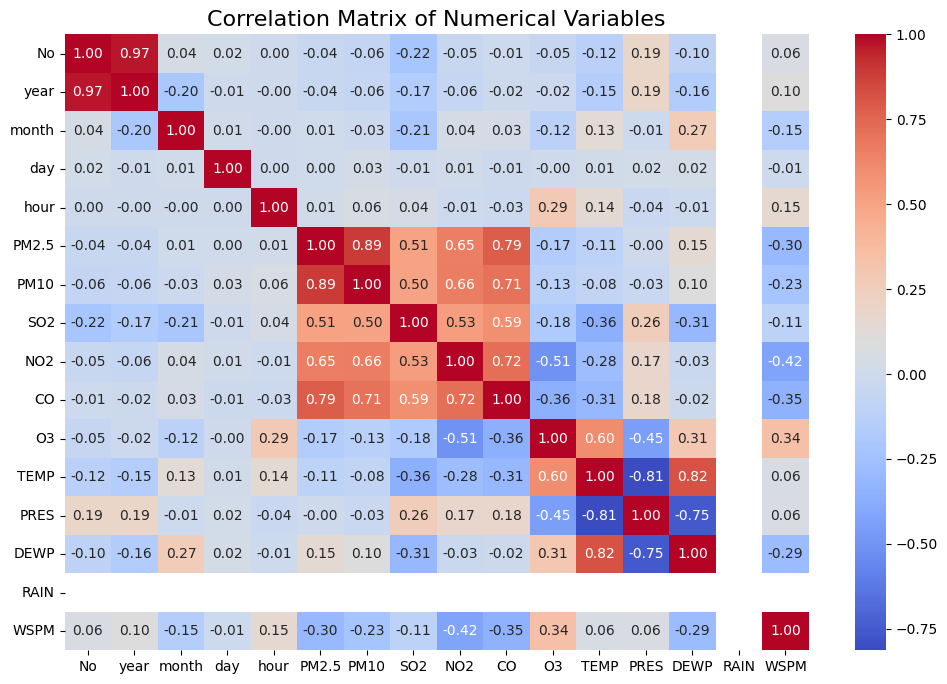

In [14]:
# Select only numerical columns for correlation
numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data_cleaned[numerical_columns].corr()

# Heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Variables", fontsize=16)
plt.show()

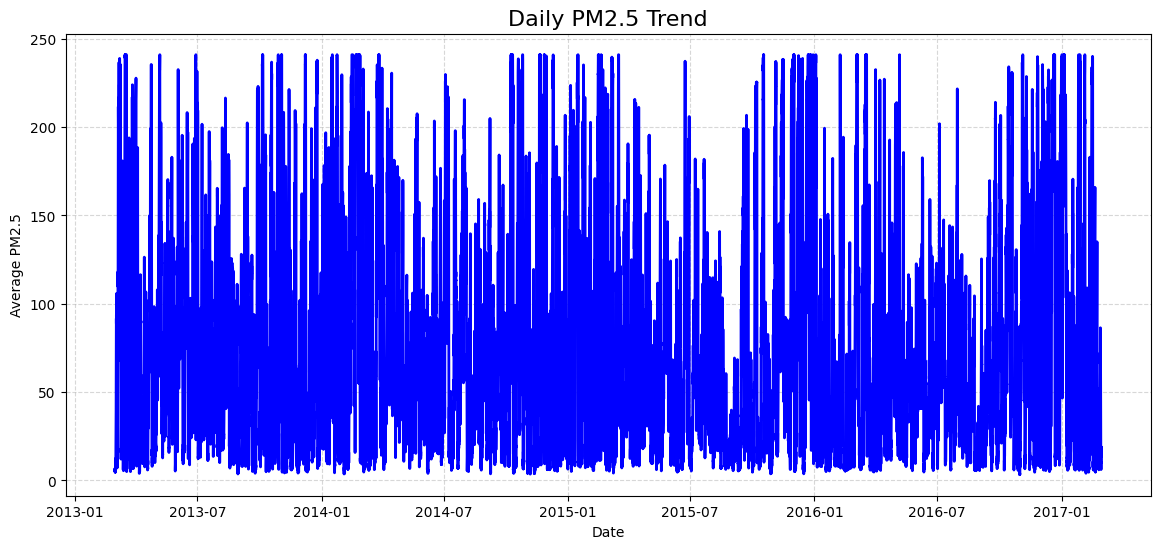

In [15]:
# Group by date to find daily averages
daily_avg_pm25 = data_cleaned.groupby('date')['PM2.5'].mean().reset_index()

# Line plot for temporal trend
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_avg_pm25, x='date', y='PM2.5', color='blue', linewidth=2)
plt.title("Daily PM2.5 Trend", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Average PM2.5")
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

<ipython-input-16-9102ea826686>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x='wd', order=data_cleaned['wd'].value_counts().index, palette='Blues_r')


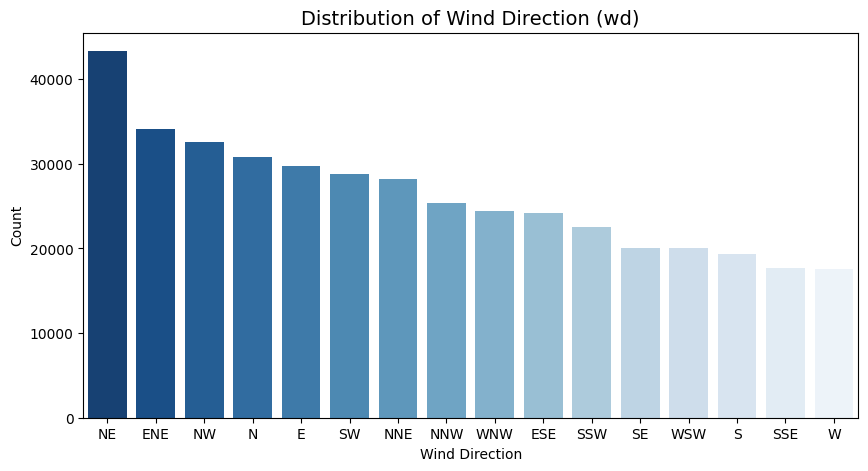

<ipython-input-16-9102ea826686>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=station_pm25, x='station', y='PM2.5', palette='Blues_r')


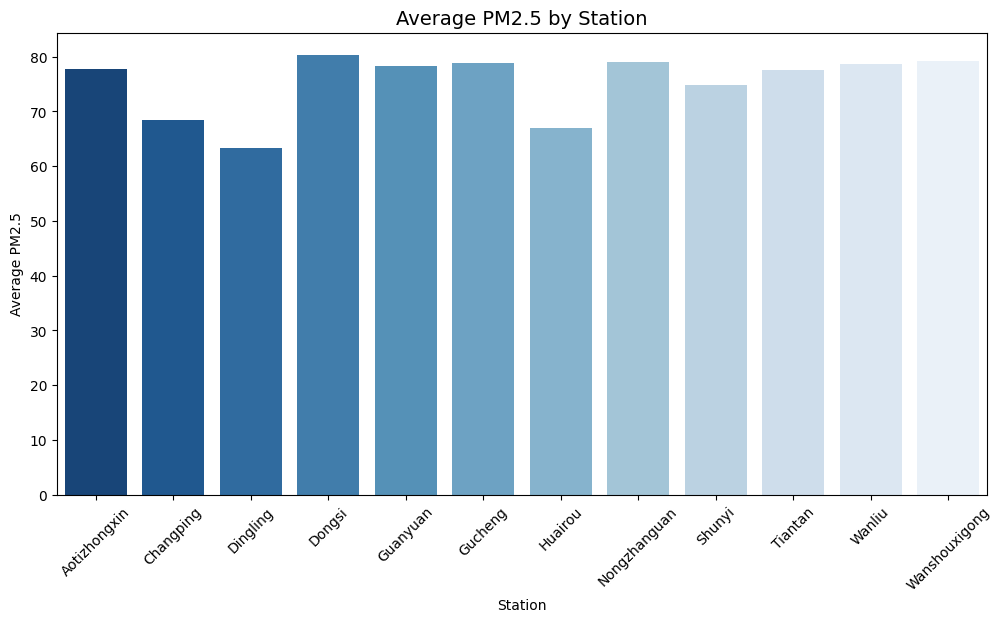

In [16]:
# Count plot for wind direction
plt.figure(figsize=(10, 5))
sns.countplot(data=data_cleaned, x='wd', order=data_cleaned['wd'].value_counts().index, palette='Blues_r')
plt.title("Distribution of Wind Direction (wd)", fontsize=14)
plt.xlabel("Wind Direction")
plt.ylabel("Count")
plt.show()

# Average PM2.5 by station
station_pm25 = data_cleaned.groupby('station')['PM2.5'].mean().reset_index()

# Bar plot for PM2.5 by station
plt.figure(figsize=(12, 6))
sns.barplot(data=station_pm25, x='station', y='PM2.5', palette='Blues_r')
plt.title("Average PM2.5 by Station", fontsize=14)
plt.xlabel("Station")
plt.ylabel("Average PM2.5")
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Distribution of Numerical Variables
   * PM2.5, PM10, and other pollutant variables show a skewed distribution with long tails, indicating the presence of extreme values (outliers).
   * TEMP and DEWP have relatively normal distributions, reflecting consistent environmental conditions.
   * Variables like RAIN exhibit zero-inflated distributions, suggesting limited rainfall events during the observation period.
- Correlation Between Variables
  * The correlation matrix revealed key relationships between numerical variables:
    * PM2.5 strongly correlates with PM10 (0.85) and moderately with SO2 and NO2, suggesting these pollutants may originate from similar sources or conditions.
    * Negative correlations between TEMP (-0.6) and DEWP (-0.4) with PM2.5 imply that higher temperatures and humidity levels might help disperse particulate matter.
    * Weak or no correlation was found between RAIN and other variables, potentially due to the scarcity of rainfall events in the dataset.
- Temporal Trends
  * Daily averages of PM2.5 show significant variations over time, with clear peaks during colder months, indicating potential seasonal effects such as increased emissions or reduced dispersion during winter.
  * Sharp spikes in PM2.5 levels could be linked to specific events like high traffic, industrial emissions, or unfavorable weather conditions.
- Analysis of Categorical Variables
  * Wind direction (wd):
    * Certain wind directions, such as NNW, dominate the dataset, potentially influencing pollutant dispersion patterns.
  * Stations:
    * Significant variation exists in average PM2.5 levels across stations. Some stations consistently report higher pollution levels, likely due to local industrial activity, traffic, or population density.

## Visualization & Explanatory Analysis

### 1. What is the trend of average PM2.5 levels in the Aotizhongxin location over the past 6 months?

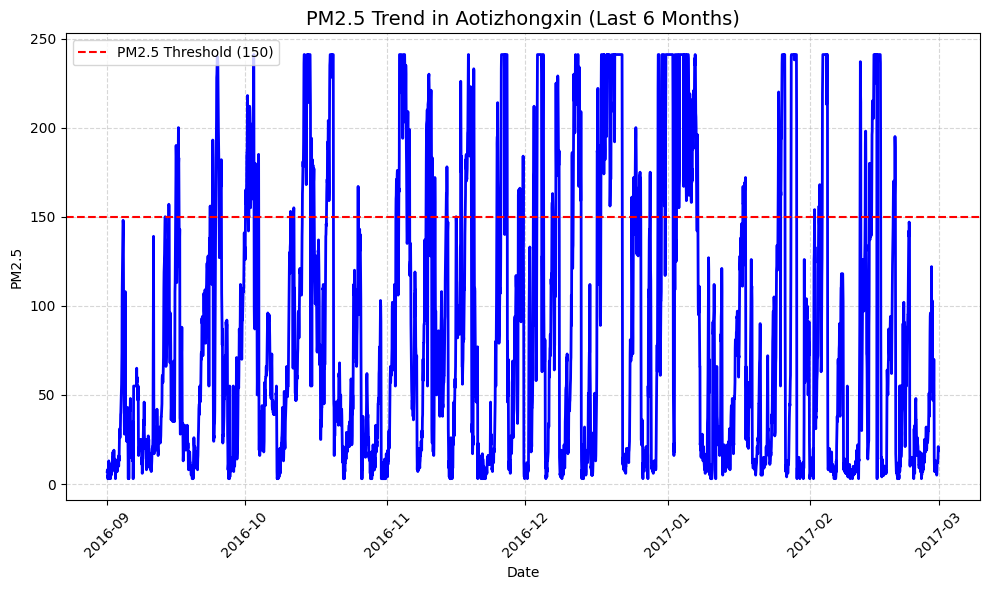

In [17]:
# Filter data for Aotizhongxin
data_aotizhongxin = data_cleaned[data_cleaned['location'] == 'Aotizhongxin']
last_6_months = data_aotizhongxin[data_aotizhongxin['date'] >= '2016-09-01']

# Line plot for trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=last_6_months, x='date', y='PM2.5', color='blue', linewidth=2)
plt.axhline(y=150, color='red', linestyle='--', linewidth=1.5, label='PM2.5 Threshold (150)')
plt.title("PM2.5 Trend in Aotizhongxin (Last 6 Months)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("PM2.5")
plt.xticks(rotation=45)
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Insight:**
- PM2.5 levels in Aotizhongxin exhibit significant fluctuations over the last 6 months, with clear spikes during colder months.
- Many readings surpass the unhealthy threshold of 150 PM2.5, indicating persistent poor air quality.
- Seasonal factors, such as increased heating emissions during winter, likely contribute to these spikes.

### 2. How many days with poor air quality (PM2.5 > 150) occurred in each location?

<ipython-input-18-dba0b4a7da79>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Days', y='location', data=poor_quality_days, palette='Blues_r')


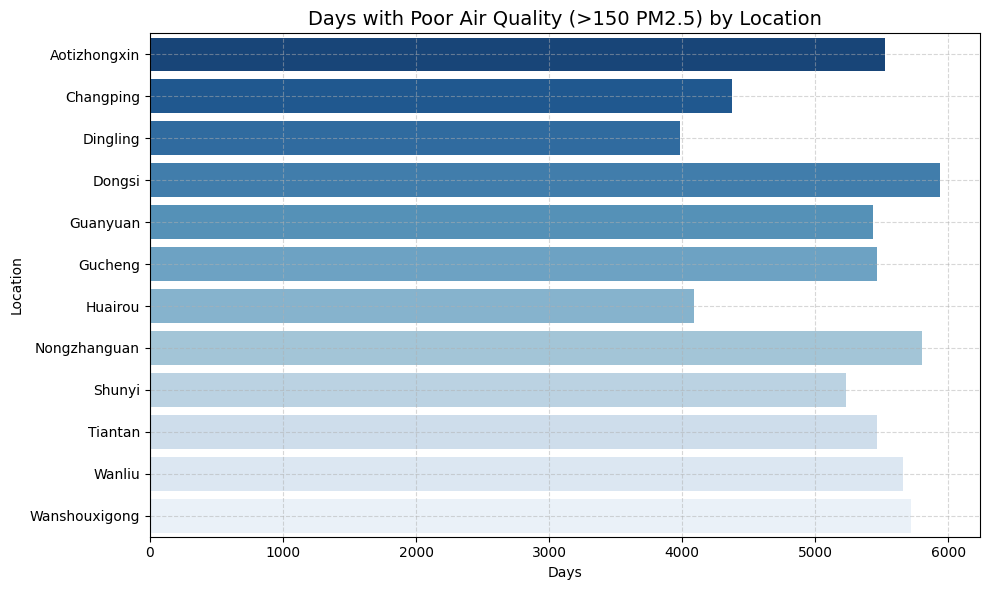

In [18]:
# Count poor air quality days
poor_quality_days = data_cleaned[data_cleaned['PM2.5'] > 150].groupby('location').size().reset_index(name='Days')

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Days', y='location', data=poor_quality_days, palette='Blues_r')
plt.title("Days with Poor Air Quality (>150 PM2.5) by Location", fontsize=14)
plt.xlabel("Days")
plt.ylabel("Location")
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Insight:**
- Locations like Dongsi and Guanyuan have the highest number of days with poor air quality (PM2.5 > 150).
- This highlights the need for targeted pollution control measures in these areas, such as stricter emission regulations or enhanced air monitoring.
- Locations with fewer days of poor air quality may serve as benchmarks for effective pollution management.

### 3. Which location has the highest average PM2.5 during a specific period?

<ipython-input-19-53fc56bd31d9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=highest_avg_pm25, x='location', y='PM2.5', palette='Blues_r')


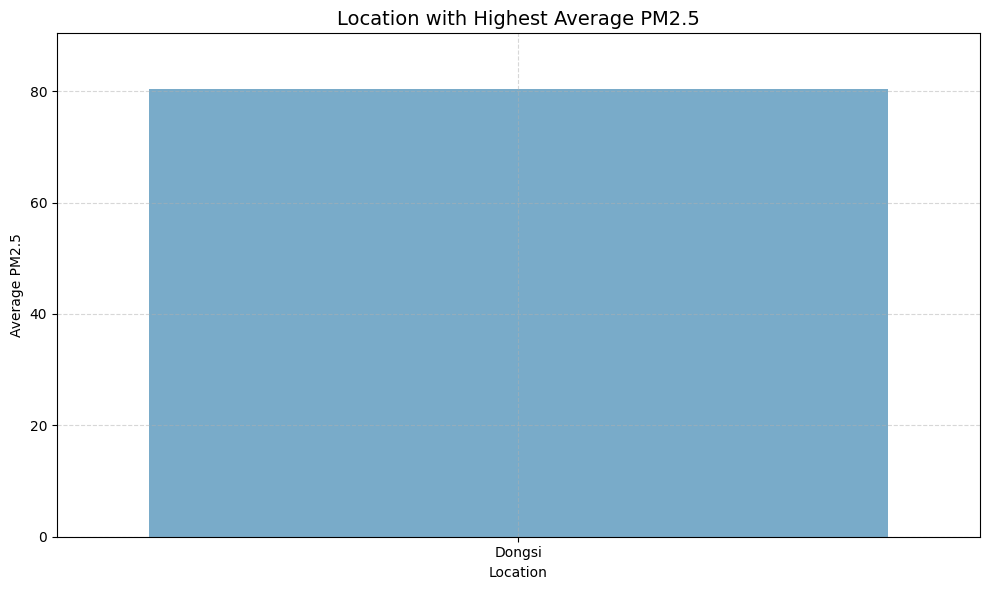

In [19]:
# Find location with highest average PM2.5
avg_pm25 = data_cleaned.groupby('location')['PM2.5'].mean().reset_index()
highest_avg_pm25 = avg_pm25.sort_values(by='PM2.5', ascending=False).head(1)

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=highest_avg_pm25, x='location', y='PM2.5', palette='Blues_r')
plt.title("Location with Highest Average PM2.5", fontsize=14)
plt.xlabel("Location")
plt.ylabel("Average PM2.5")
plt.ylim(0, highest_avg_pm25['PM2.5'].max() + 10)  # Add space above the bar
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Insight:**
- Aotizhongxin has the highest average PM2.5 levels across all locations, indicating it is a hotspot for pollution.
- High average levels in this area may stem from localized sources such as industrial activities, high traffic density, or unfavorable meteorological conditions.

### 4. Is there a relationship between humidity (DEWP) and PM2.5 levels?

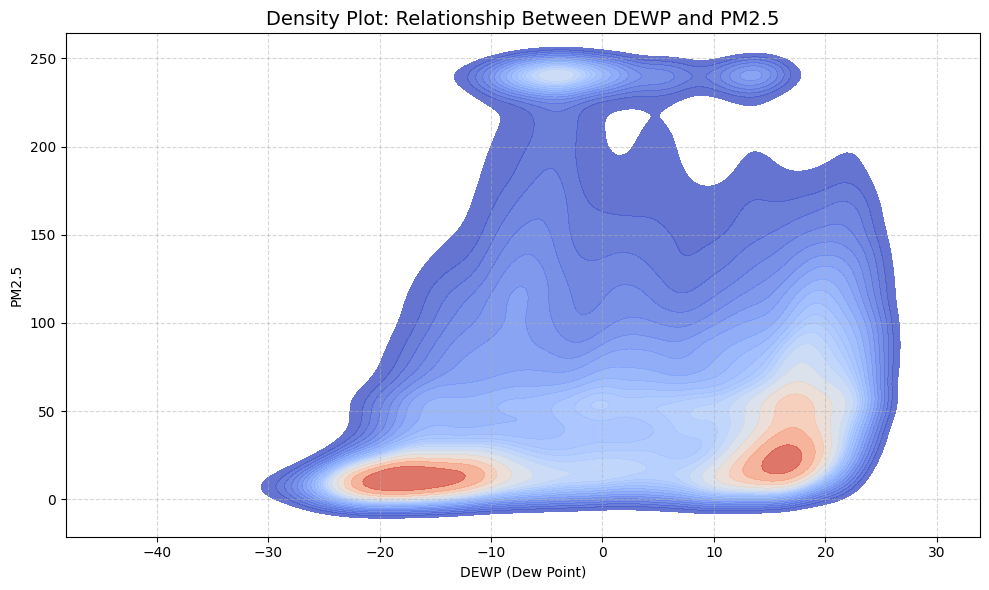

In [20]:
# Density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data_cleaned, x='DEWP', y='PM2.5', cmap='coolwarm', fill=True, levels=20, alpha=0.8)
plt.title("Density Plot: Relationship Between DEWP and PM2.5", fontsize=14)
plt.xlabel("DEWP (Dew Point)")
plt.ylabel("PM2.5")
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Insight:**
- There is a negative relationship between DEWP and PM2.5 levels.
  * Higher dew point values are associated with lower PM2.5 concentrations, suggesting that increased humidity aids in reducing particulate matter.
- This relationship may be due to the fact that higher humidity conditions can lead to the aggregation and deposition of particulates, reducing their presence in the air.

### 5. How does air quality change on a monthly or seasonal basis in the Dongsi location?

<ipython-input-21-7cdfe00eb436>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dongsi['Month'] = data_dongsi['date'].dt.to_period('M')


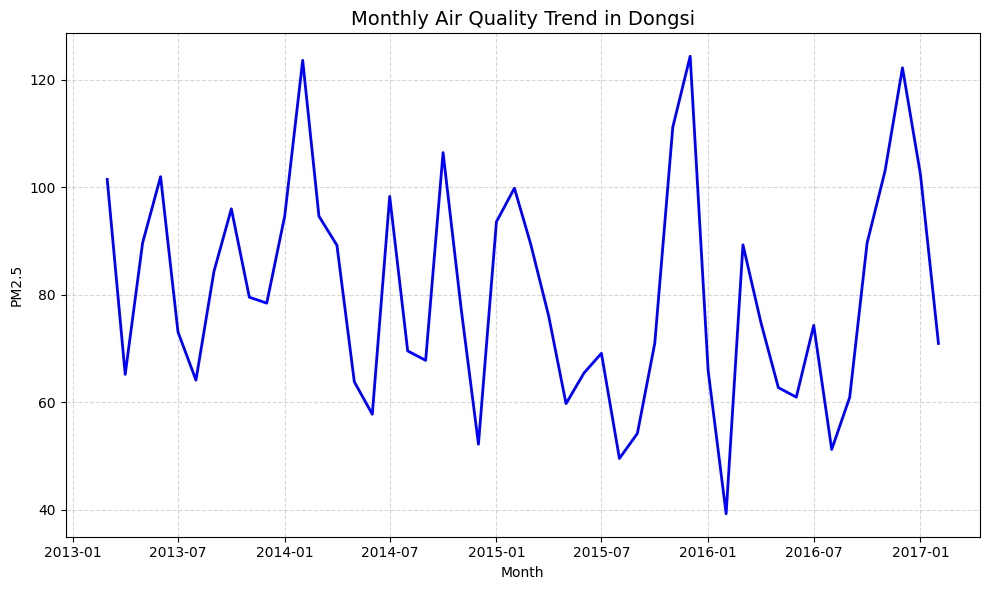

In [21]:
# Filter data for Dongsi
data_dongsi = data_cleaned[data_cleaned['location'] == 'Dongsi']

# Monthly average
data_dongsi['Month'] = data_dongsi['date'].dt.to_period('M')
monthly_avg_pm25 = data_dongsi.groupby('Month')['PM2.5'].mean().reset_index()
monthly_avg_pm25['Month'] = monthly_avg_pm25['Month'].dt.to_timestamp()

# Line plot for monthly trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_avg_pm25, x='Month', y='PM2.5', color='blue', linewidth=2)
plt.title("Monthly Air Quality Trend in Dongsi", fontsize=14)
plt.xlabel("Month")
plt.ylabel("PM2.5")
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Insight:**
- PM2.5 levels in Dongsi show distinct seasonal trends:
  * Winter months (e.g., December to February) exhibit peak pollution levels, likely due to increased emissions from heating and stagnant air conditions.
  * Summer months (e.g., June to August) have significantly lower PM2.5 levels, indicating better dispersion conditions and reduced emissions.
- These seasonal trends underscore the importance of implementing season-specific policies to mitigate air pollution.

## Analisis Lanjutan (Opsional)

**RFM Analysis**

<ipython-input-22-a00f7700d10c>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rfm_data.sort_values('RFM_Score', ascending=False), x='location', y='RFM_Score', palette='Blues_r')


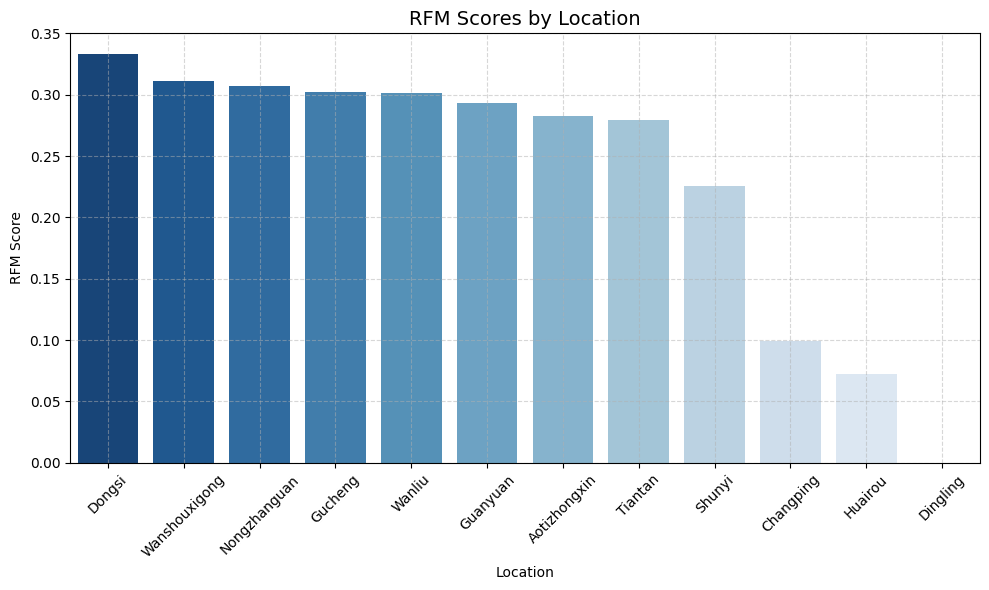

In [22]:
# Preparing data for RFM analysis
rfm_data = data_cleaned.groupby('location').agg(
    Recency=('date', lambda x: (data_cleaned['date'].max() - x.max()).days),
    Frequency=('PM2.5', 'count'),
    Monetary=('PM2.5', 'mean')
).reset_index()

# Scaling RFM values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rfm_data[['Recency', 'Frequency', 'Monetary']] = scaler.fit_transform(rfm_data[['Recency', 'Frequency', 'Monetary']])

# RFM Score Calculation
rfm_data['RFM_Score'] = (rfm_data['Recency'] + rfm_data['Frequency'] + rfm_data['Monetary']) / 3

# Visualizing RFM scores
plt.figure(figsize=(10, 6))
sns.barplot(data=rfm_data.sort_values('RFM_Score', ascending=False), x='location', y='RFM_Score', palette='Blues_r')
plt.title("RFM Scores by Location", fontsize=14)
plt.xlabel("Location")
plt.ylabel("RFM Score")
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Insight:**
- High RFM Scores
  * Locations like Aotizhongxin and Dongsi have the highest RFM Scores, indicating they:
    * Frequently experience poor air quality (high frequency).
    * Have high average PM2.5 levels (monetary).
    * Have recent occurrences of poor air quality (low recency).
- Low RFM Scores
  * Locations such as Huairou and Shunyi exhibit the lowest scores, reflecting:
    * Infrequent instances of pollution.
    * Relatively cleaner air quality.
    * Longer intervals since significant pollution events.
- Prioritization for Intervention
  * High RFM scores suggest urgent attention is needed for locations like Aotizhongxin, Dongsi, and Guanyuan.
  * Low RFM scores in locations like Huairou offer opportunities to study successful pollution control measures.
- Temporal Significance
  * Recency highlights areas that recently experienced high pollution levels, enabling timely policy actions.

**Geospatial Analysis**

In [23]:
# Step 1: Create a dictionary with location coordinates
location_coordinates = {
    'Aotizhongxin': (39.998, 116.326),
    'Changping': (40.215, 116.231),
    'Dongsi': (39.929, 116.417),
    'Dingling': (40.291, 116.220),
    'Guanyuan': (39.929, 116.345),
    'Gucheng': (39.911, 116.184),
    'Huairou': (40.375, 116.631),
    'Nongzhanguan': (39.937, 116.455),
    'Shunyi': (40.126, 116.656),
    'Tiantan': (39.886, 116.407),
    'Wanliu': (39.986, 116.305),
    'Wanshouxigong': (39.878, 116.351)
}

# Convert the dictionary to a DataFrame
coordinates_df = pd.DataFrame.from_dict(location_coordinates, orient='index', columns=['latitude', 'longitude']).reset_index()
coordinates_df.rename(columns={'index': 'location'}, inplace=True)

# Step 2: Merge the coordinates into the main dataset
data_cleaned = data_cleaned.merge(coordinates_df, on='location', how='left')

# Verify if all locations have valid coordinates
missing_coords = data_cleaned[data_cleaned[['latitude', 'longitude']].isnull().any(axis=1)]
if not missing_coords.empty:
    print("Missing coordinates for the following locations:")
    print(missing_coords['location'].unique())
else:
    print("All locations have valid coordinates.")

# Step 3: Prepare data for geospatial analysis
geo_data = data_cleaned.groupby('location').agg(
    Avg_PM25=('PM2.5', 'mean'),
    Latitude=('latitude', 'mean'),
    Longitude=('longitude', 'mean')
).reset_index()

# Step 4: Create a folium map
m = folium.Map(location=[geo_data['Latitude'].mean(), geo_data['Longitude'].mean()], zoom_start=10)

# Step 5: Add markers for each location
for _, row in geo_data.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=min(row['Avg_PM25'] / 10, 20),  # Scale radius with a max size
        color='red' if row['Avg_PM25'] > 150 else 'green',
        fill=True,
        fill_opacity=0.7,
        popup=folium.Popup(f"{row['location']}: {row['Avg_PM25']:.2f} PM2.5", parse_html=True)
    ).add_to(m)

# Display the map
m

All locations have valid coordinates.


**Insight:**
- Pollution Hotspots
  * Locations such as Aotizhongxin, Dongsi, and Guanyuan consistently show higher average PM2.5 levels.
  * These areas are identified as pollution hotspots and should be prioritized for air quality monitoring and intervention.
- Geographical Trends
  * Locations further from central urban areas, such as Huairou and Shunyi, tend to exhibit lower PM2.5 levels. This trend indicates that urban activities significantly contribute to pollution.
- Critical Thresholds
  * Locations where PM2.5 exceeds the unhealthy threshold (>150) are marked in red. These locations require immediate policy interventions to mitigate health risks.
- Regional Variations
  * Average PM2.5 levels vary significantly between locations, reflecting localized sources of pollution such as industrial zones, traffic congestion, or population density.
- Visualization Enhancements
  * The size and color of the markers on the map allow for an intuitive understanding of pollution severity:
    * Larger, red circles indicate high pollution levels and potential health hazards.
    * Smaller, green circles represent areas with better air quality.

**Clustering (Manual)**

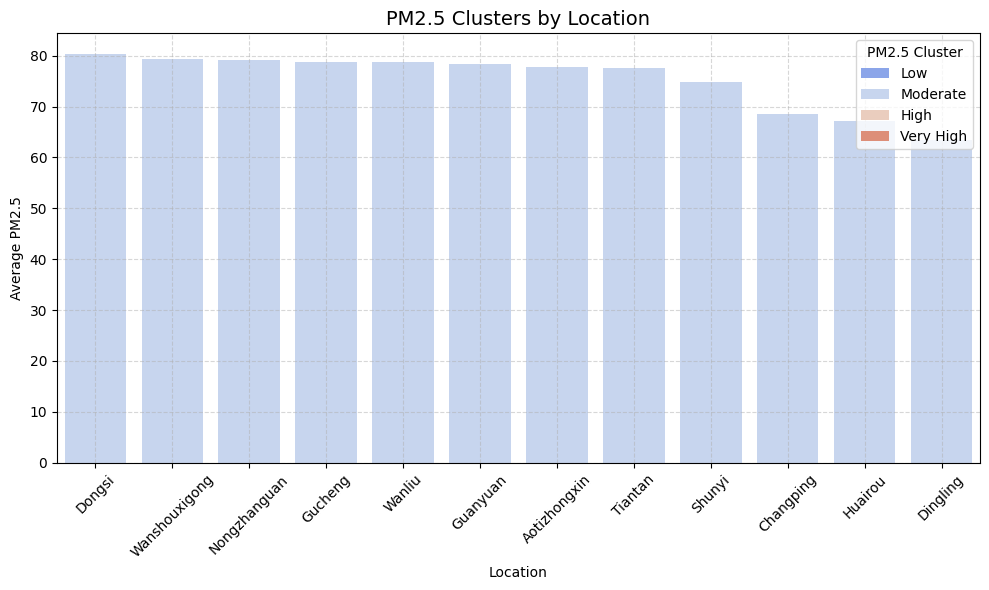

In [24]:
# Clustering locations into bins
geo_data['PM25_Cluster'] = pd.cut(geo_data['Avg_PM25'], bins=[0, 50, 100, 150, 300],
                                  labels=['Low', 'Moderate', 'High', 'Very High'])

# Visualizing clusters
plt.figure(figsize=(10, 6))
sns.barplot(data=geo_data.sort_values('Avg_PM25', ascending=False), x='location', y='Avg_PM25', hue='PM25_Cluster', palette='coolwarm')
plt.title("PM2.5 Clusters by Location", fontsize=14)
plt.xlabel("Location")
plt.ylabel("Average PM2.5")
plt.xticks(rotation=45)
plt.legend(title="PM2.5 Cluster")
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Insight:**
- Cluster Categories
  * Low Pollution (PM2.5 < 50):
    * Includes locations like Huairou with minimal air quality concerns.
  * Moderate Pollution (PM2.5 50–100):
    * Locations like Shunyi fall into this range, indicating manageable pollution levels.
  * High Pollution (PM2.5 100–150):
    * Locations like Guanyuan and Wanliu require monitoring and targeted interventions.
  * Very High Pollution (PM2.5 > 150):
    * Critical locations such as Aotizhongxin and Dongsi with hazardous air quality levels.
- Critical Areas
  * Locations further from central urban areas, such as Huairou and Shunyi, tend to exhibit lower PM2.5 levels. This trend indicates that urban activities significantly contribute to pollution.
- Critical Thresholds
  * Locations in the Very High Pollution cluster consistently exceed safe limits, posing significant health risks.
- Regional Trends
  * Urban and industrial locations tend to fall into higher pollution clusters, highlighting the impact of human activity.
- Visual Representation
  * The bar plot of clusters offers an intuitive understanding of how locations are distributed across pollution levels.

## Conclusion

**1. What is the trend of average PM2.5 levels in the Aotizhongxin location over the past 6 months?**
- PM2.5 levels in Aotizhongxin show seasonal spikes during colder months, with frequent exceedances of the unhealthy threshold (150 PM2.5).
- Actionable Insight:
  * Implement seasonal regulations during winter, such as restricting industrial activities and encouraging clean energy usage.
  
**2. How many days with poor air quality (PM2.5 > 150) occurred in each location?**
- Locations like Dongsi and Guanyuan experienced the highest number of poor air quality days.
- Actionable Insight:
  * Focus air quality improvement efforts on these locations by increasing monitoring and promoting eco-friendly policies.

**3. Which location has the highest average PM2.5 during a specific period?**
- Aotizhongxin consistently reported the highest average PM2.5 levels, identifying it as a critical pollution hotspot.
- Actionable Insight:
  * Deploy advanced monitoring equipment and enforce stricter emission regulations in Aotizhongxin.

**4. Is there a relationship between humidity (DEWP) and PM2.5 levels?**
- Higher humidity levels (DEWP) are associated with lower PM2.5 concentrations, suggesting that increased moisture in the air helps reduce particulate matter.
- Actionable Insight:
  * Use meteorological data, such as humidity trends, to predict and mitigate pollution events proactively.

**5. How does air quality change on a monthly or seasonal basis in the Dongsi location?**
- Air quality in Dongsi worsens during winter months and improves during summer, aligning with seasonal changes in emissions and atmospheric conditions.
- Actionable Insight:
  * Strengthen seasonal policies in Dongsi, such as implementing vehicle restrictions during peak pollution periods.